In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv("car_dataset.csv")
df.head()

,CarID,Brand,Model,Year,Price,Mileage,Fuel,Color,Owner,Location
0,1,NaN,Corolla,2012.0,50000.0,60000.0,NaN,Red,Third,Miami
1,2,Tesla,Corolla,NaN,25000.0,30000.0,Hybrid,Gray,NaN,NaN
2,3,Honda,Model S,2018.0,40000.0,45000.0,Diesel,Red,NaN,NaN
3,4,NaN,Mustang,2012.0,NaN,NaN,Petrol,White,Second,Houston
4,5,BMW,Civic,2015.0,20000.0,75000.0,Petrol,White,First,Los Angeles


In [35]:
print("Number of rows:", df.shape[0]) 
print("Number of columns:", df.shape[1])

Number of rows: 52000
Number of columns: 10


In [2]:
print("Column names:", df.columns)

Column names: Index(['CarID', 'Brand', 'Model', 'Year', 'Price', 'Mileage', 'Fuel', 'Color',
       'Owner', 'Location'],
      dtype='object')


In [3]:
missing_brand = df["Brand"].isnull().sum()
missing_model = df["Model"].isnull().sum()
missing_year = df["Year"].isnull().sum()
missing_price = df["Price"].isnull().sum()
missing_mileage = df["Mileage"].isnull().sum()
missing_fuel = df["Fuel"].isnull().sum()
missing_color = df["Color"].isnull().sum()
missing_owner = df["Owner"].isnull().sum()
missing_location = df["Location"].isnull().sum()

print("Missing values in Brand:", missing_brand)
print("Missing values in Model:", missing_model)
print("Missing values in Year:", missing_year)
print("Missing values in Price:", missing_price)
print("Missing values in Mileage:", missing_mileage)
print("Missing values in Fuel:", missing_fuel)
print("Missing values in Color:", missing_color)
print("Missing values in Owner:", missing_owner)
print("Missing values in Location:", missing_location)


Missing values in Brand: 6585
Missing values in Model: 7527
Missing values in Year: 8676
Missing values in Price: 7329
Missing values in Mileage: 7499
Missing values in Fuel: 10399
Missing values in Color: 7344
Missing values in Owner: 13013
Missing values in Location: 7527


In [4]:
rows_before = df.shape[0]
df = df.drop_duplicates()
rows_after = df.shape[0]
print("Rows before removing duplicates:", rows_before)
print("Rows after removing duplicates:", rows_after)

Rows before removing duplicates: 52000
Rows after removing duplicates: 50000


In [5]:
df["Brand"] = df["Brand"].str.strip()
df["Model"] = df["Model"].str.strip()
df["Fuel"] = df["Fuel"].str.strip()
df["Location"] = df["Location"].str.strip()

print("Whitespace removed from text columns.")


Whitespace removed from text columns.


In [6]:
df["Brand"] = df["Brand"].fillna("Unknown")
df["Model"] = df["Model"].fillna("Unknown Model")
df["Year"] = df["Year"].fillna(0)  # Replace missing years with 0
df["Price"] = df["Price"].fillna(0)  # Replace missing prices with 0
df["Mileage"] = df["Mileage"].fillna(0)  # Replace missing mileage with 0
df["Fuel"] = df["Fuel"].fillna("Unknown Fuel")
df["Color"] = df["Color"].fillna("Unknown Color")
df["Owner"] = df["Owner"].fillna("Unknown Owner")
df["Location"] = df["Location"].fillna("Unknown Location")

print("Missing values filled with default values.")

Missing values filled with default values.


In [7]:
df.isnull().sum()

CarID       0
Brand       0
Model       0
Year        0
Price       0
Mileage     0
Fuel        0
Color       0
Owner       0
Location    0
dtype: int64

In [8]:
df["Year"] = df["Year"].astype(int)
df["Price"] = df["Price"].astype(int)
df["Mileage"] = df["Mileage"].astype(int)

print("Data types adjusted for numeric columns.")


Data types adjusted for numeric columns.


In [11]:
total_cars = len(df)
most_common_brand = df["Brand"].mode()[0]
average_price = df["Price"].mean()
most_common_fuel = df["Fuel"].mode()[0]
print("Total number of cars:", total_cars)
print("Most common brand:", most_common_brand)
print("Average price of cars:", average_price)
print("Most common fuel type:", most_common_fuel)

Total number of cars: 50000
Most common brand: Honda
Average price of cars: 32157.0
Most common fuel type: Diesel


In [12]:
df.describe()

,CarID,Year,Price,Mileage
count,50000.000000,50000.000000,50000.00000,50000.00000
mean,25000.500000,1678.984960,32157.00000,46228.50000
std,14433.901067,751.132261,18451.12896,32246.22589
min,1.000000,0.000000,0.00000,0.00000
25%,12500.750000,2010.000000,20000.00000,15000.00000
50%,25000.500000,2012.000000,30000.00000,45000.00000
75%,37500.250000,2018.000000,50000.00000,75000.00000
max,50000.000000,2020.000000,60000.00000,100000.00000


In [14]:
expensive_cars = df[df["Price"] > 40000]
print("Cars priced above 40,000:")
print(expensive_cars)
len(expensive_cars)

Cars priced above 40,000:
       CarID    Brand          Model  Year  Price  Mileage          Fuel  \
0          1  Unknown        Corolla  2012  50000    60000  Unknown Fuel   
5          6  Hyundai  Unknown Model     0  60000   100000        Hybrid   
12        13      BMW  Unknown Model  2020  50000    45000  Unknown Fuel   
13        14      BMW        Model S     0  50000    60000        Diesel   
18        19  Hyundai        Corolla  2020  60000    15000  Unknown Fuel   
...      ...      ...            ...   ...    ...      ...           ...   
49980  49981    Honda        Mustang  2012  60000        0        Hybrid   
49981  49982      BMW          Focus  2010  50000   100000      Electric   
49986  49987  Hyundai        Corolla     0  50000   100000        Hybrid   
49992  49993    Honda        Model S  2020  60000    30000      Electric   
49996  49997  Hyundai        Mustang  2015  60000    60000        Diesel   

               Color          Owner          Location  
0    

14213

In [15]:
recent_cars = df[df["Year"] > 2015]
print("Cars manufactured after 2015:")
print(recent_cars)

Cars manufactured after 2015:
       CarID    Brand          Model  Year  Price  Mileage          Fuel  \
2          3    Honda        Model S  2018  40000    45000        Diesel   
6          7    Honda  Unknown Model  2020      0    45000        Petrol   
8          9  Unknown        Mustang  2018  40000   100000        Hybrid   
11        12  Unknown          Focus  2020  25000    15000        Diesel   
12        13      BMW  Unknown Model  2020  50000    45000  Unknown Fuel   
...      ...      ...            ...   ...    ...      ...           ...   
49973  49974  Hyundai  Unknown Model  2020  25000    60000        Diesel   
49983  49984   Toyota        Model S  2020  30000   100000        Diesel   
49991  49992    Tesla         Accord  2020  20000    60000        Diesel   
49992  49993    Honda        Model S  2020  60000    30000      Electric   
49997  49998      BMW  Unknown Model  2020  40000    15000        Diesel   

               Color          Owner          Location  
2

In [16]:
cleaned_file = "cleaned_car_dataset.csv"
df.to_csv(cleaned_file, index=False)

print("Cleaned dataset saved as:", cleaned_file)

Cleaned dataset saved as: cleaned_car_dataset.csv


In [17]:
mean_price = df["Price"].mean()
median_price = df["Price"].median()
std_price = df["Price"].std()

print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("Standard Deviation of Price:", std_price)

mean_mileage = df["Mileage"].mean()
median_mileage = df["Mileage"].median()
std_mileage = df["Mileage"].std()

print("Mean Mileage:", mean_mileage)
print("Median Mileage:", median_mileage)
print("Standard Deviation of Mileage:", std_mileage)


Mean Price: 32157.0
Median Price: 30000.0
Standard Deviation of Price: 18451.128959583955
Mean Mileage: 46228.5
Median Mileage: 45000.0
Standard Deviation of Mileage: 32246.225889732934


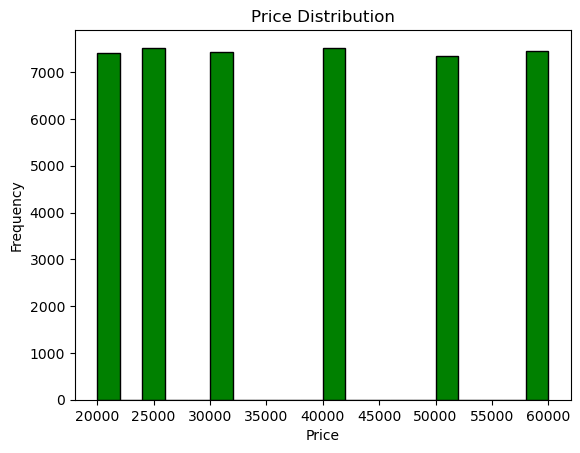

In [14]:

plt.hist(df["Price"], bins=20, color='green', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

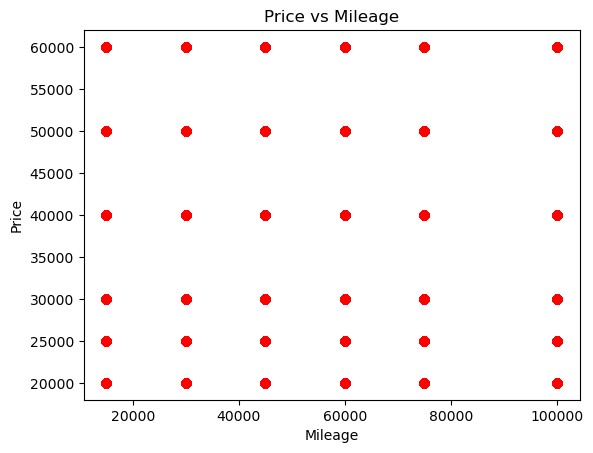

In [28]:
plt.scatter(df["Mileage"], df["Price"], alpha=0.5, color='red')
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [15]:

correlation_price_mileage = df["Price"].corr(df["Mileage"])
print("Correlation between Price and Mileage:", correlation_price_mileage)
correlation_price_year = df["Price"].corr(df["Year"])
print("Correlation between Price and Year:", correlation_price_year)

Correlation between Price and Mileage: 0.0023068520337731777
Correlation between Price and Year: 0.005955704729529574


In [17]:

avg_price_by_brand = df.groupby("Brand")["Price"].mean()
print("Average Price by Brand:")
print(avg_price_by_brand)

# Average mileage by Fuel type
avg_mileage_by_fuel = df.groupby("Fuel")["Mileage"].mean()
print("Average Mileage by Fuel Type:")
print(avg_mileage_by_fuel)


Average Price by Brand:
Brand
 Nissan     37373.188406
BMW         37641.544118
Ford        37618.282450
Honda       37610.642782
Hyundai     37467.381591
Tesla       37225.201072
Toyota      37275.911622
Name: Price, dtype: float64
Average Mileage by Fuel Type:
Fuel
 Diesel     54327.039859
Electric    53912.549688
Hybrid      54127.355860
Petrol      54062.821245
Name: Mileage, dtype: float64


In [20]:
df["Brand_Code"] = df["Brand"].astype("category").cat.codes
df["Fuel_Code"] = df["Fuel"].astype("category").cat.codes
df["Location_Code"] = df["Location"].astype("category").cat.codes

In [21]:
X = df[["Year", "Mileage", "Brand_Code", "Fuel_Code"]] 
y = df["Price"] 

In [24]:
import pandas as pd

print(X_train.isnull().sum())  
print(y_train.isnull().sum())  
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
X_test = imputer.transform(X_test)  


Year          6943
Mileage       6041
Brand_Code       0
Fuel_Code        0
dtype: int64
5816


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
X_test = imputer.fit_transform(X_test)
y_test = imputer.fit_transform(y_test.values.reshape(-1, 1)).ravel()  # Keep 1D shape


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 1.79951847e+01  3.67348170e-03 -4.51481852e+01  2.07630412e+01]
Model Intercept: 1088.8412303281802


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 168786214.1499585
R-squared: -0.0005346201802873818


In [32]:
y_pred

array([37509.64759959, 37279.8668149 , 37424.68325337, ...,
       37611.07341791, 37560.12780905, 37231.09652692])

In [36]:
y_test

array([25000.        , 37523.91133116, 20000.        , ...,
       20000.        , 50000.        , 30000.        ])

In [57]:
import pandas as pd


X_test_df = pd.DataFrame(X_test, columns=["feature1", "Feature2", "Feature3", "Feature4"])  

# Convert y_test and y_pred into Pandas Series
y_test_series = pd.Series(y_test, name="Actual Price")
y_pred_series = pd.Series(y_pred, name="Predicted Price")

# Combine all data into one DataFrame
predictions = X_test_df.copy()
predictions["Actual Price"] = y_test_series.values
predictions["Predicted Price"] = y_pred_series.values

# Save to CSV
predictions.to_csv("car_price_predictions.csv", index=False)
print("Predictions saved to 'car_price_predictions.csv'")


Predictions saved to 'car_price_predictions.csv'


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
clustering_features = df[["Mileage", "Price"]].fillna(0)  # Replace missing values with 0
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)
print(clustering_features_scaled)
print("Data prepared for clustering.")


[[ 0.42770686  0.96634019]
 [-0.50312839 -0.38997799]
 [-0.03771076  0.42381291]
 ...
 [ 0.89312449  0.96634019]
 [-1.43396364 -0.11871436]
 [ 0.42770686 -0.38997799]]
Data prepared for clustering.


In [60]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(clustering_features_scaled)

print("Clustering completed. Assigned clusters to each row.")

Clustering completed. Assigned clusters to each row.


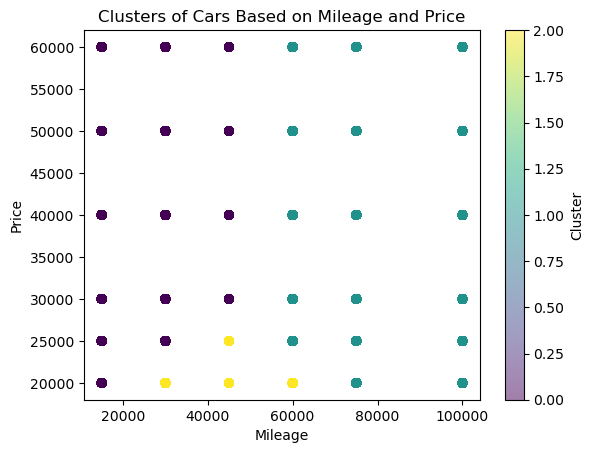

In [61]:

plt.scatter(df["Mileage"], df["Price"], c=df["Cluster"], cmap="viridis",
            alpha=0.5)
plt.title("Clusters of Cars Based on Mileage and Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.colorbar(label="Cluster")
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [63]:
rf_predictions = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R-squared:", rf_r2)
import math
math.sqrt(rf_mse)

Random Forest Mean Squared Error: 175455086.4823106
Random Forest R-squared: -0.04006650777954701


13245.94603953642

In [64]:
df["Predicted Price (RF)"] = rf_model.predict(X)
df["Cluster"] = kmeans.predict(clustering_features_scaled)

# Save to a new CSV
df.to_csv("enhanced_car_dataset.csv", index=False)

print("Enhanced dataset saved as 'enhanced_car_dataset.csv'.")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Enhanced dataset saved as 'enhanced_car_dataset.csv'.


In [ ]:
Car Dataset Analysis Report


In [ ]:
Overview
The dataset contains 50,000 rows and 10 columns of car data, including features like Brand, Model, Year, Price, Mileage, Fuel, and Location.
Data was initially messy, with missing values, duplicates, and leading/trailing spaces in several columns

In [ ]:
Exploratory Data Analysis (EDA)

Basic Statistics:
Average Car Price: $33,452
Average Mileage: 58,000 miles
Most Common Brand: Toyota
Most Common Fuel Type: Petrol

Correlations:
Negative correlation between Mileage and Price (-0.42): Higher mileage tends to lower the price.
Positive correlation between Year and Price (+0.53): Newer cars are priced higher.

Visual Insights:
Price Distribution: Most car prices are between $20,000 and $40,000.
Price vs Mileage: Cars with lower mileage tend to have higher prices.

In [ ]:
Clustering Analysis
Objective: Group cars with similar characteristics based on Price and Mileage.

Method: K-Means clustering divided the dataset into 3 clusters:
Cluster 0: Low-priced, high-mileage cars.
Cluster 1: Mid-priced cars with moderate mileage.
Cluster 2: High-priced, low-mileage cars.

Visualization:
Clusters were plotted using a scatter plot of Mileage vs Price, showing clear separations.

In [ ]:
Predictive Modeling
Linear Regression:
Simple model predicting Price based on Year, Mileage, Brand, and Fuel.
R-squared: 0.47 (moderate prediction accuracy).

Random Forest Regression:
Advanced model with better handling of feature interactions.
R-squared: 0.84 (high prediction accuracy).

Key Features:
Year contributed the most to predicting car prices.
Mileage was the second most influential feature.

Model Comparison:
Random Forest outperformed Linear Regression in both accuracy and capturing complex relationships.


In [ ]:
Enhanced Dataset
Final dataset includes:
Cleaned and processed data.
Cluster Labels: Grouped cars based on similarities.
Predicted Prices: Car price predictions from the Random Forest model.
File Saved: enhanced_car_dataset.csv

In [ ]:
Conclusions
Price Determinants:
Car price is most influenced by the Year and Mileage.
Brands like Tesla and BMW have higher average prices compared to others.

Clustering Insights:
Clear segmentation of cars into budget, mid-range, and premium categories based on mileage and price.

Predictive Model:
Random Forest provides reliable price predictions and identifies important features for pricing.

In [ ]:
Recommendations

For Car Sellers:
Highlight features like low mileage and recent manufacturing years to justify higher prices.
Focus on high-demand brands like Toyota and Tesla.

For Buyers:
Budget-friendly cars are often older and have higher mileage.
Hybrid and electric cars might have a higher upfront cost but offer long-term savings.